# Preprocessing data

In [1]:
import numpy as np

dataset_path = '../../data/mars_for_students.npz'

data = np.load(dataset_path)
training_set = data["training_set"]

X_train = training_set[:, 0]
y_train = training_set[:, 1]

X_test = data["test_set"]

C:\Users\camil\AppData\Local\Temp\ipykernel_20724\3919925102.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab10', 5)


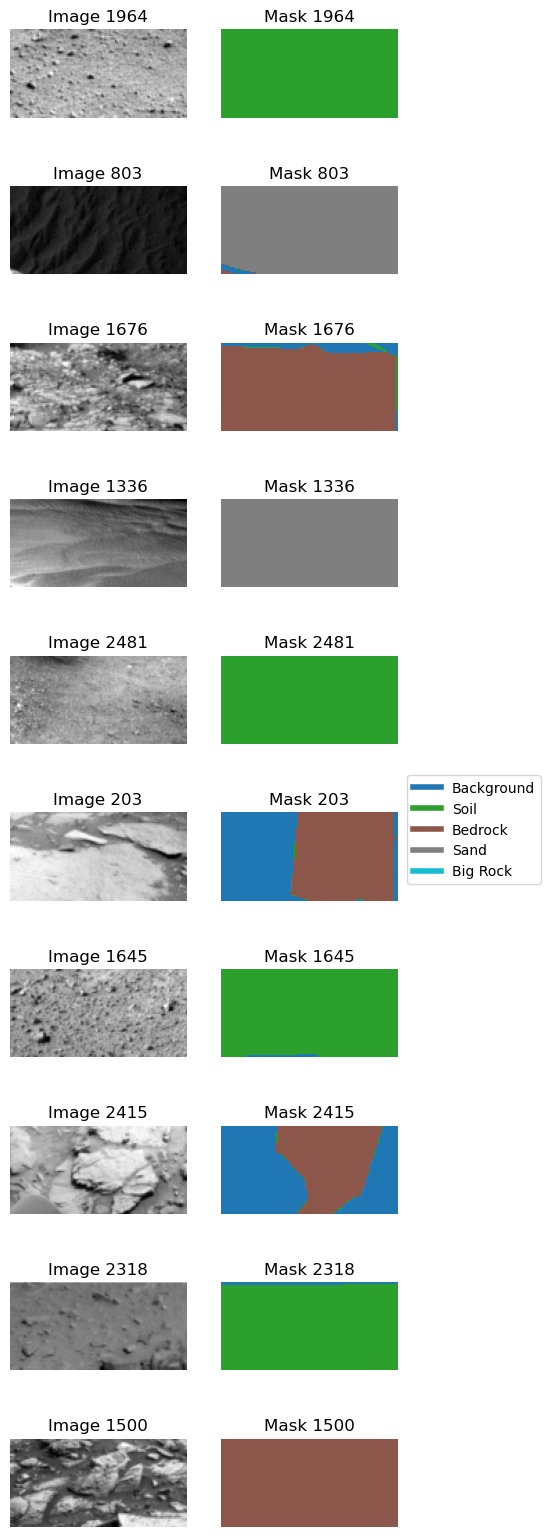

In [2]:
import matplotlib.pyplot as plt

# Select 10 random indices
random_indices = np.random.choice(len(X_train), 10, replace=False)

# Define a color map for the labels
cmap = plt.cm.get_cmap('tab10', 5)

# Plot the images and their corresponding masks
fig, axes = plt.subplots(10, 2, figsize=(5, 20))
for i, idx in enumerate(random_indices):
    axes[i, 0].imshow(X_train[idx], cmap='gray')
    axes[i, 0].axis('off')
    axes[i, 0].set_title(f'Image {idx}')
    
    mask = y_train[idx]
    axes[i, 1].imshow(mask, cmap=cmap, vmin=0, vmax=4)
    axes[i, 1].axis('off')
    axes[i, 1].set_title(f'Mask {idx}')

# Create a legend for the labels
labels = ['Background', 'Soil', 'Bedrock', 'Sand', 'Big Rock']
handles = [plt.Line2D([0], [0], color=cmap(i), lw=4) for i in range(5)]
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.2, 0.5))
plt.show()

Class Distribution:
Class 0: 5466886 pixels
Class 1: 7131118 pixels
Class 2: 4863930 pixels
Class 3: 3933183 pixels
Class 4: 26963 pixels


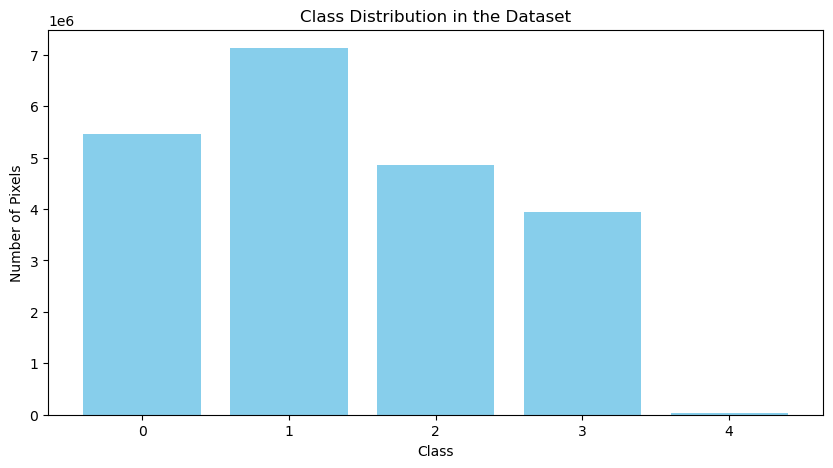

In [3]:
# Flatten the masks to count the occurrences of each class
flattened_masks = y_train.flatten()

# Count the occurrences of each class
unique, counts = np.unique(flattened_masks, return_counts=True)

# Create a dictionary to store the class distribution
class_distribution = dict(zip(unique, counts))

# Print the class distribution
print("Class Distribution:")
for cls, count in class_distribution.items():
    print(f"Class {int(cls)}: {count} pixels")

# Plot the class distribution
plt.figure(figsize=(10, 5))
plt.bar(class_distribution.keys(), class_distribution.values(), color='skyblue')
plt.xlabel('Class')
plt.ylabel('Number of Pixels')
plt.title('Class Distribution in the Dataset')
plt.xticks(list(class_distribution.keys()))
plt.show()

Count of Images Containing Each Class:
Class 0: 2197 images
Class 1: 1391 images
Class 2: 1270 images
Class 3: 973 images
Class 4: 63 images


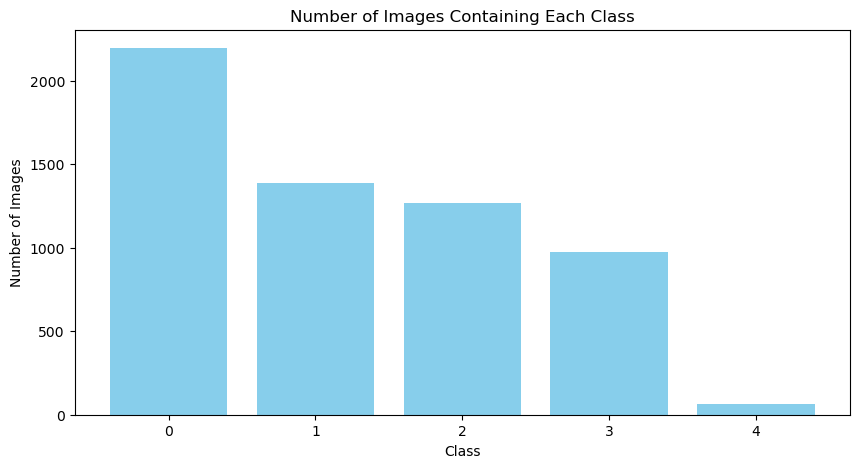

In [4]:
# Initialize a dictionary to store the count of images containing each class
class_image_count = {cls: 0 for cls in unique}

# Iterate through each mask and update the count for each class
for mask in y_train:
    for cls in unique:
        if cls in mask:
            class_image_count[cls] += 1

# Print the count of images containing each class
print("Count of Images Containing Each Class:")
for cls, count in class_image_count.items():
    print(f"Class {int(cls)}: {count} images")

# Plot the count of images containing each class
plt.figure(figsize=(10, 5))
plt.bar(class_image_count.keys(), class_image_count.values(), color='skyblue')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Number of Images Containing Each Class')
plt.xticks(list(class_image_count.keys()))
plt.show()

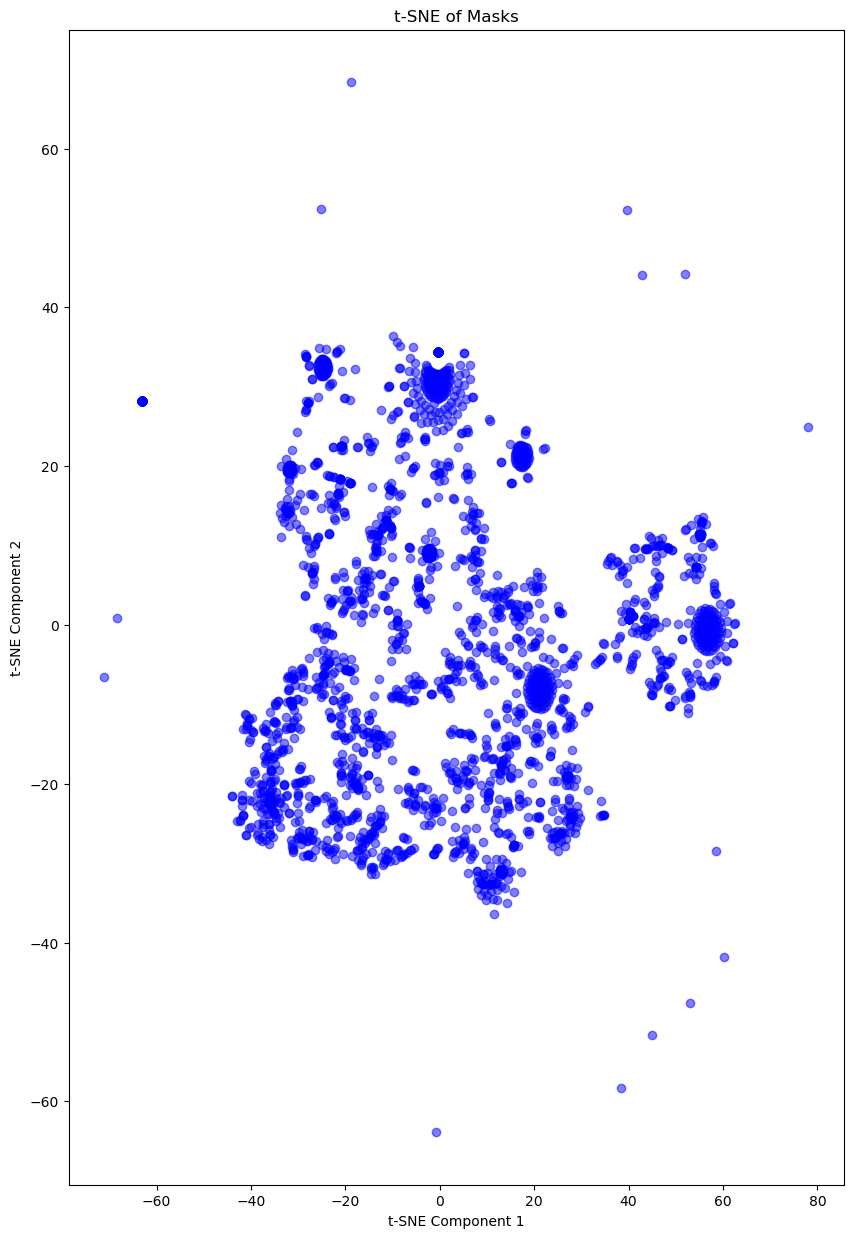

In [5]:
from sklearn.manifold import TSNE

y_train_flat = y_train.reshape(y_train.shape[0], -1)

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
y_train_tsne = tsne.fit_transform(y_train_flat)

# Plot the t-SNE results with a more vertical scale
plt.figure(figsize=(10, 15))  # Adjust the figure size to make it more vertical
plt.scatter(y_train_tsne[:, 0], y_train_tsne[:, 1], c='blue', alpha=0.5)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE of Masks')
plt.show()

In [6]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN to the t-SNE results
dbscan_tsne = DBSCAN(eps=1, min_samples=1)
dbscan_tsne_labels = dbscan_tsne.fit_predict(y_train_tsne)

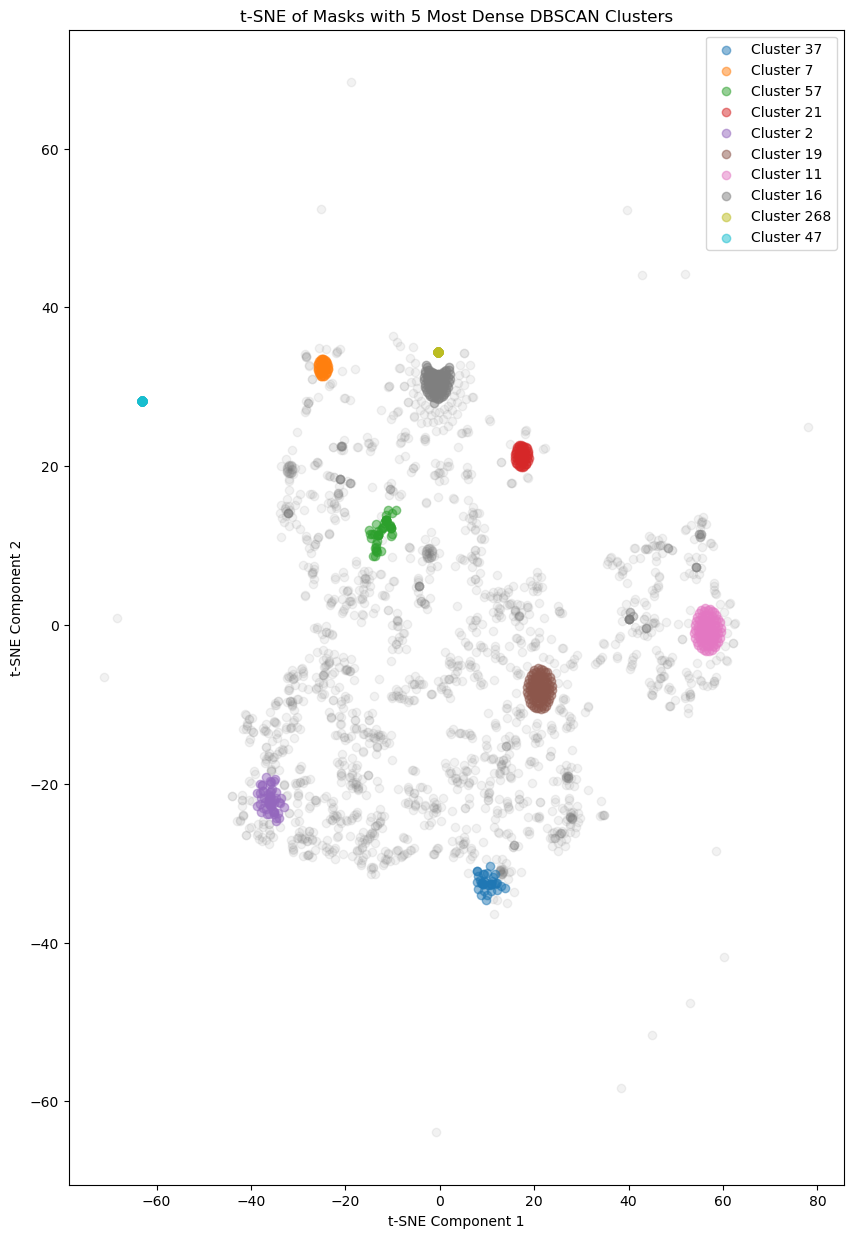

In [7]:
# Count the number of points in each cluster
unique_labels, counts = np.unique(dbscan_tsne_labels, return_counts=True)

# Get the labels of the 5 most dense clusters
most_dense_labels = unique_labels[np.argsort(counts)[-10:]]

# Create a mask for the points in the 5 most dense clusters
mask = np.isin(dbscan_tsne_labels, most_dense_labels)

# Plot the t-SNE results with different colors for the 5 most dense clusters
plt.figure(figsize=(10, 15))

# Plot the rest of the points in gray and very transparent
plt.scatter(y_train_tsne[~mask, 0], y_train_tsne[~mask, 1], color='gray', alpha=0.1)

for label in most_dense_labels:
    cluster_mask = dbscan_tsne_labels == label
    plt.scatter(y_train_tsne[cluster_mask, 0], y_train_tsne[cluster_mask, 1], label=f'Cluster {label}', alpha=0.5)

plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE of Masks with 5 Most Dense DBSCAN Clusters')
plt.legend()
plt.show()

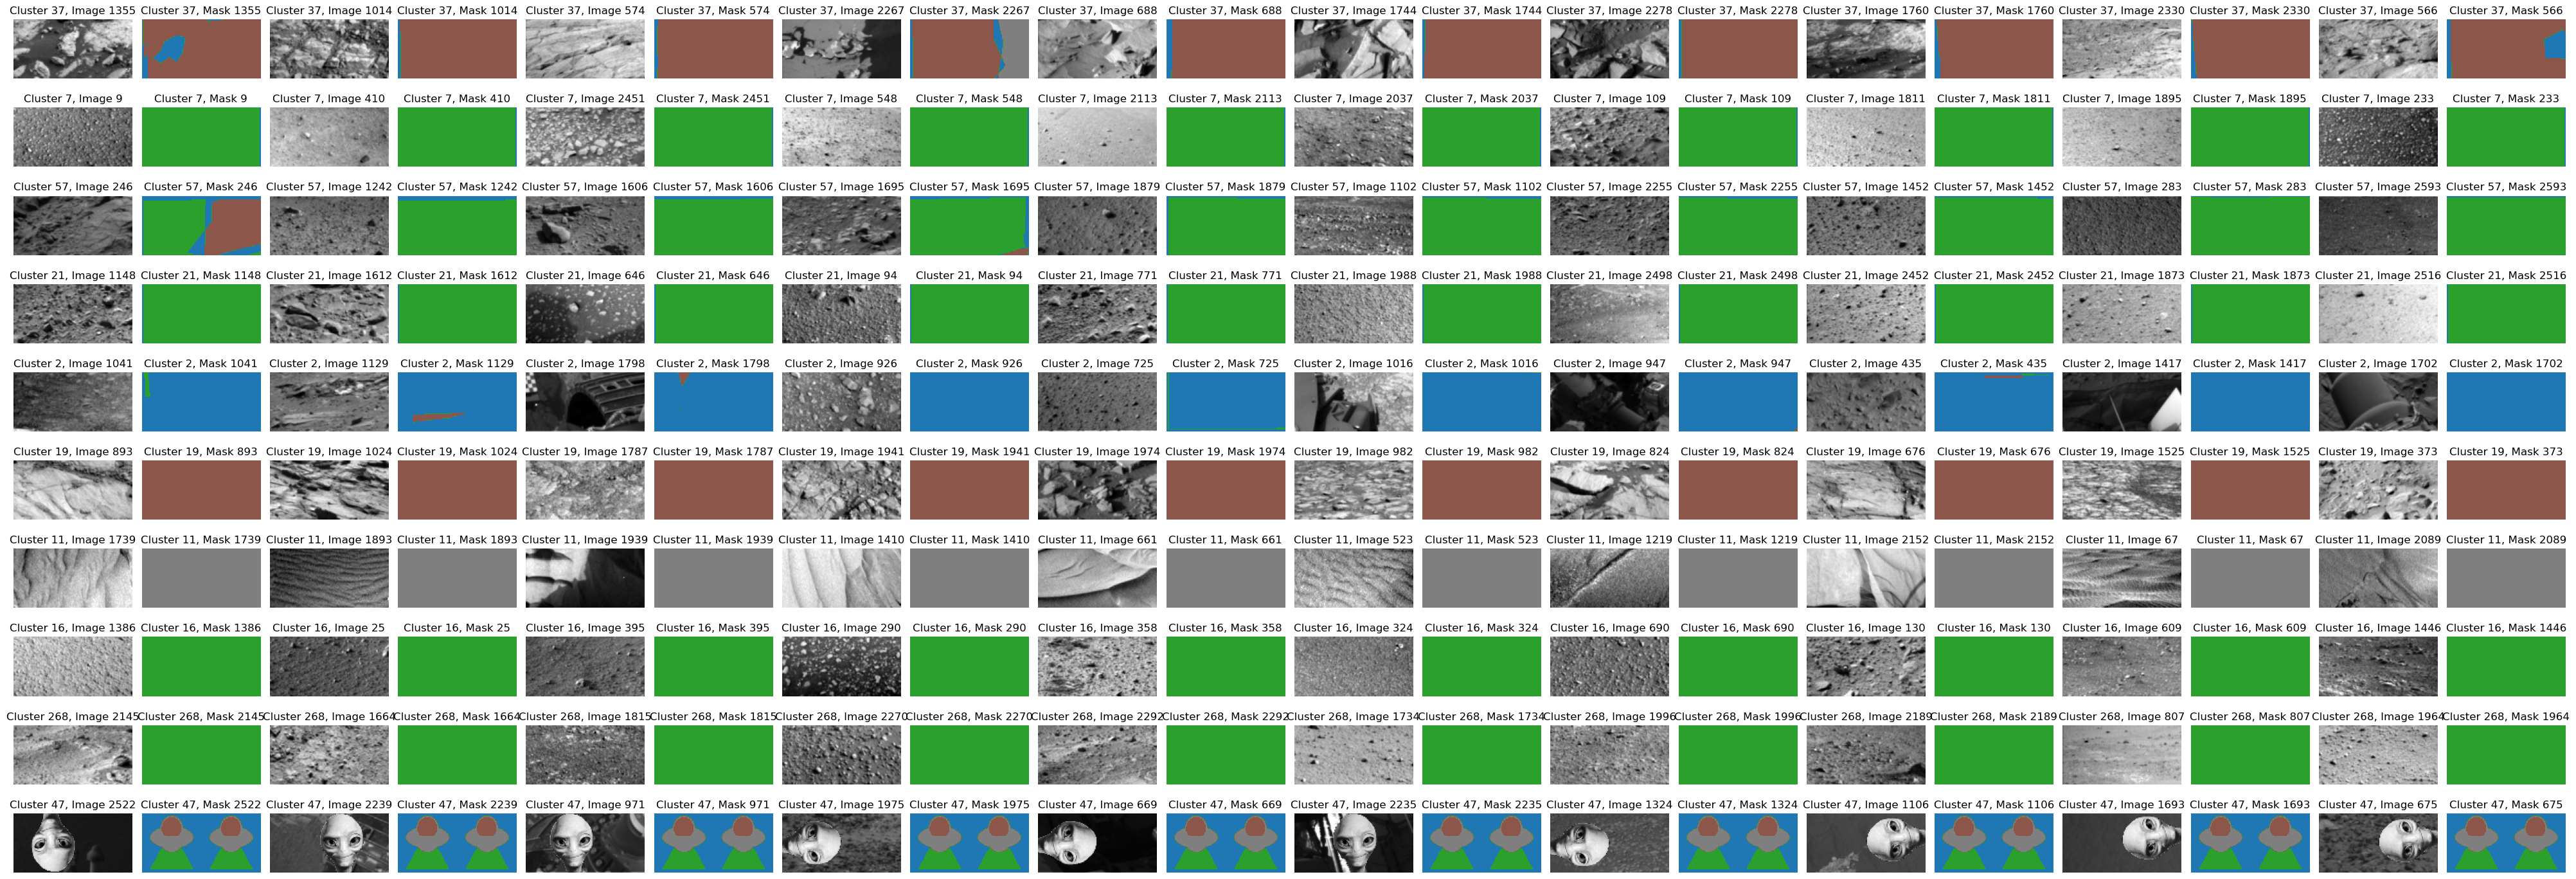

In [8]:
# Select 10 random images from each of the 7 most dense clusters
fig, axes = plt.subplots(10, 20, figsize=(40, 14))

for i, label in enumerate(most_dense_labels):
    cluster_indices = np.where(dbscan_tsne_labels == label)[0]
    random_indices = np.random.choice(cluster_indices, 10, replace=False)
    
    for j, idx in enumerate(random_indices):
        axes[i, 2*j].imshow(X_train[idx], cmap='gray')
        axes[i, 2*j].axis('off')
        axes[i, 2*j].set_title(f'Cluster {label}, Image {idx}')
        
        mask = y_train[idx]
        axes[i, 2*j+1].imshow(mask, cmap=cmap, vmin=0, vmax=4)
        axes[i, 2*j+1].axis('off')
        axes[i, 2*j+1].set_title(f'Cluster {label}, Mask {idx}')

plt.tight_layout()
plt.show()

In [9]:
# Get the indices of images not in cluster 47
indices_to_keep = np.where(dbscan_tsne_labels != 47)[0]

# Filter out the images and masks corresponding to cluster 47
X_train_filtered = X_train[indices_to_keep]
y_train_filtered = y_train[indices_to_keep]

# Update the original variables
X_train = X_train_filtered
y_train = y_train_filtered

# Print the shapes of the new datasets
print("New shape of X_train:", X_train.shape)
print("New shape of y_train:", y_train.shape)

New shape of X_train: (2505, 64, 128)
New shape of y_train: (2505, 64, 128)


C:\Users\camil\AppData\Local\Temp\ipykernel_20724\1700053580.py:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(y_pca[:, 0], y_pca[:, 1], cmap='tab10', alpha=0.5)


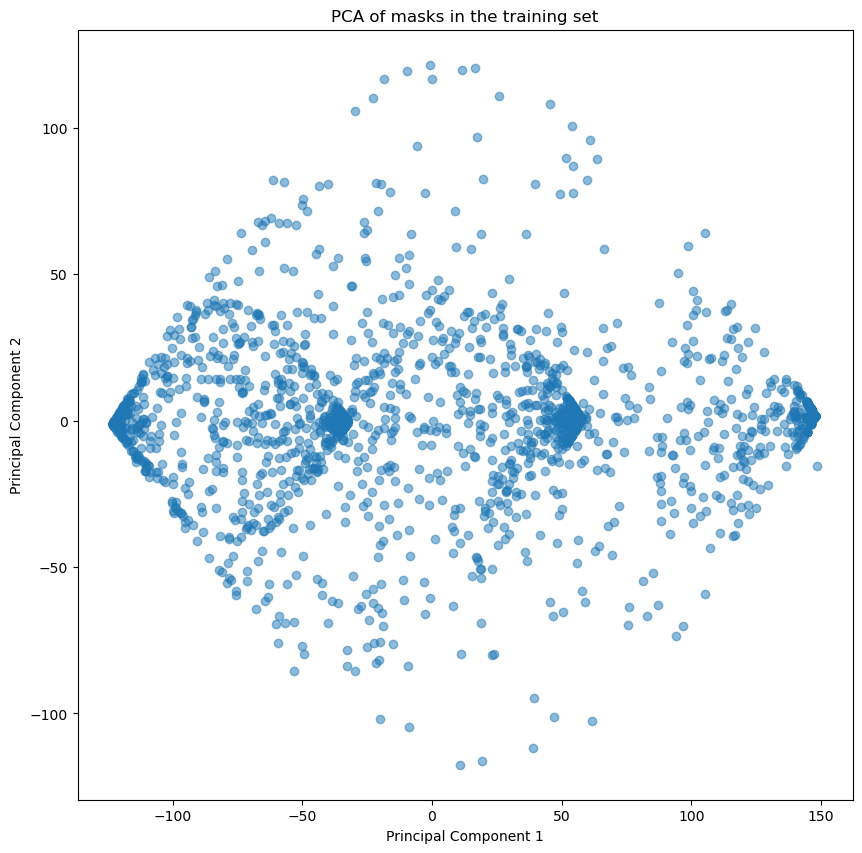

In [10]:
from sklearn.decomposition import PCA

# Flatten the images
y_train_flattened = y_train.reshape(y_train.shape[0], -1)

# Apply PCA
pca = PCA(n_components=2)
y_pca = pca.fit_transform(y_train_flattened)

# Plot the PCA results
plt.figure(figsize=(10, 10))
plt.scatter(y_pca[:, 0], y_pca[:, 1], cmap='tab10', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of masks in the training set')
plt.show()

In [11]:
from collections import Counter

# Round the PCA scores to 3 decimal places
pca_scores = [tuple(np.round(score, 3)) for score in y_pca]

# Count the occurrences of each tuple of PCA scores
pca_counter = Counter(pca_scores)

In [12]:
def show_most_common_score(n = 1):
    most_common_score = pca_counter.most_common(n)[-1]
    
    print(f"{n} most common PCA score: {most_common_score[0]}")
    print(f"{n} number of occurrences: {most_common_score[1]}")
    
    # Find indices of images with the most common PCA score
    common_indices = [i for i, score in enumerate(pca_scores) if score == most_common_score[0]]

    # Select 10 random indices from the common_indices
    random_common_indices = np.random.choice(common_indices, 10, replace=False)

    # Plot the images and their corresponding masks
    fig, axes = plt.subplots(10, 2, figsize=(10, 50))
    for i, idx in enumerate(random_common_indices):
        axes[i, 0].imshow(X_train[idx], cmap='gray')
        axes[i, 0].axis('off')
        axes[i, 0].set_title(f'Common Image {idx}')
        
        axes[i, 1].imshow(y_train[idx])
        axes[i, 1].axis('off')
        axes[i, 1].set_title(f'Mask {idx}')
    plt.tight_layout()
    plt.show()
    
    return common_indices

5 most common PCA score: (-33.359, -1.154)
5 number of occurrences: 40


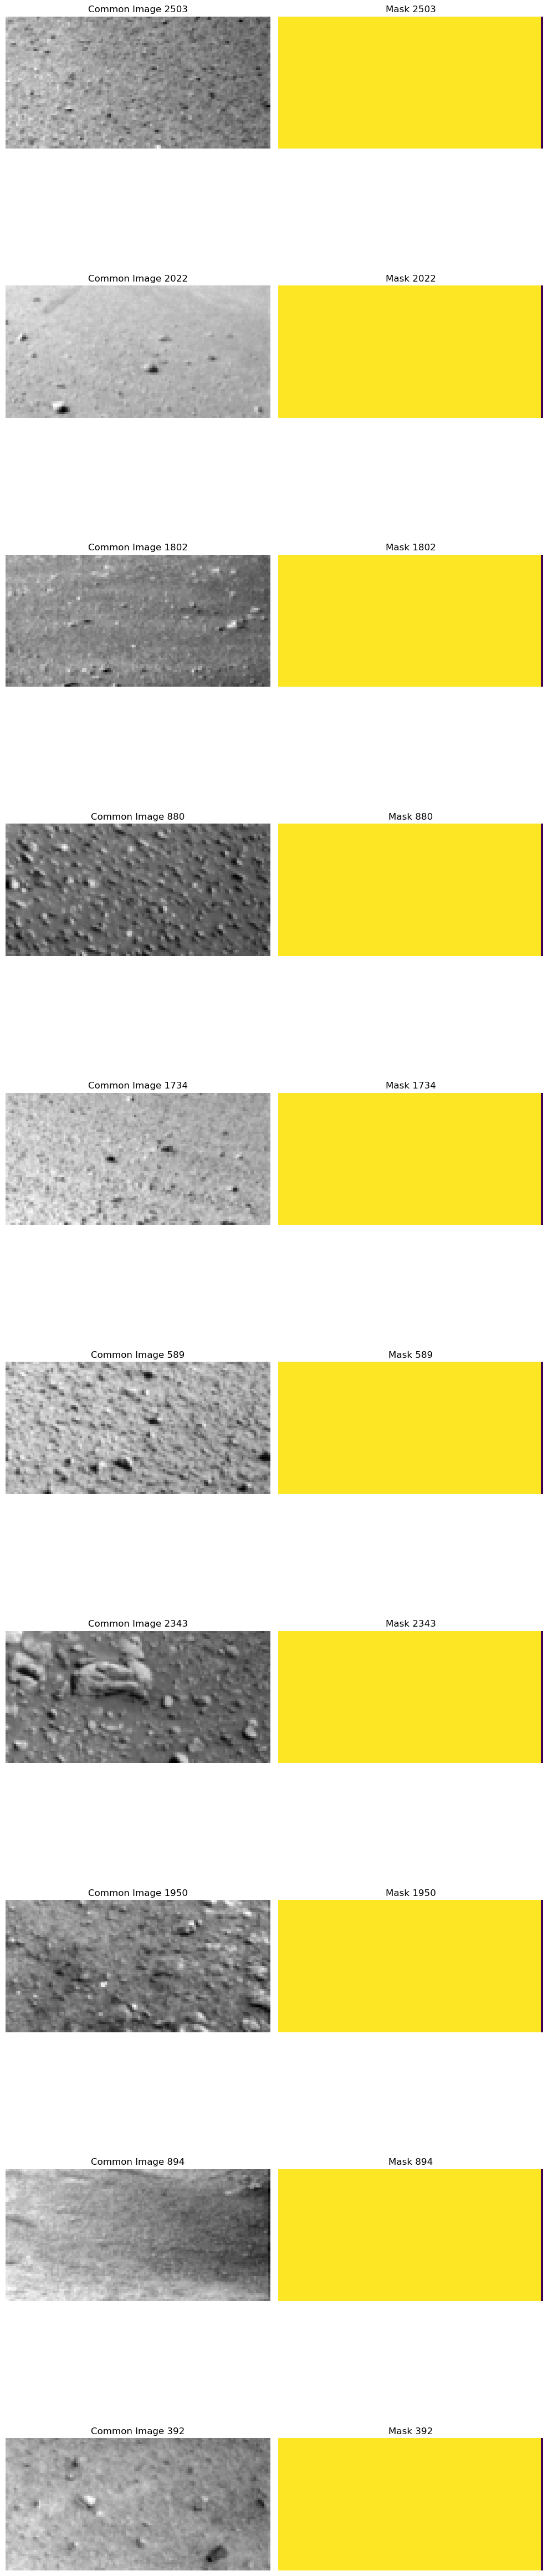

In [13]:
outliers = show_most_common_score(5)

In [14]:
import os

# Create the directory if it doesn't exist
output_dir = '../../data/new_beggining'
os.makedirs(output_dir, exist_ok=True)

# Save the dataset
output_path = os.path.join(output_dir, 'clean_mars.npz')
np.savez_compressed(output_path, X_train=X_train, y_train=y_train, X_test=X_test)

print(f"Dataset saved to {output_path}")

Dataset saved to ../../data/new_beggining\clean_mars.npz
